1. Importing vaccine country file
2. Dividing the vaccine list individually into a column
3. Combining type of vaccines into one column
4. Calculate the number of countries based on the vaccine and draw a graph

In [311]:
import pandas as pd
pd.set_option('precision', 2)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
raw = pd.read_csv('data/country_vaccinations.csv')
raw.info()
raw.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [313]:
df = raw[['country','vaccines']]
df

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca
...,...,...
8446,Zimbabwe,Sinopharm/Beijing
8447,Zimbabwe,Sinopharm/Beijing
8448,Zimbabwe,Sinopharm/Beijing
8449,Zimbabwe,Sinopharm/Beijing


In [314]:
df.columns

Index(['country', 'vaccines'], dtype='object')

In [315]:
dfcleancsv = pd.concat([df['country'], df['vaccines'].str.split(', ', expand=True)], axis=1)
dfcleancsv

,country,0,1,2,3,4
0,Afghanistan,Oxford/AstraZeneca,None,None,None,None
1,Afghanistan,Oxford/AstraZeneca,None,None,None,None
2,Afghanistan,Oxford/AstraZeneca,None,None,None,None
3,Afghanistan,Oxford/AstraZeneca,None,None,None,None
4,Afghanistan,Oxford/AstraZeneca,None,None,None,None
...,...,...,...,...,...,...
8446,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8447,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8448,Zimbabwe,Sinopharm/Beijing,None,None,None,None
8449,Zimbabwe,Sinopharm/Beijing,None,None,None,None


In [316]:
dfcleancsv.to_csv('data/test.csv')

In [317]:
vac_country=dfcleancsv.melt(id_vars=['country'])
vac_country

,country,variable,value
0,Afghanistan,0,Oxford/AstraZeneca
1,Afghanistan,0,Oxford/AstraZeneca
2,Afghanistan,0,Oxford/AstraZeneca
3,Afghanistan,0,Oxford/AstraZeneca
4,Afghanistan,0,Oxford/AstraZeneca
...,...,...,...
42250,Zimbabwe,4,None
42251,Zimbabwe,4,None
42252,Zimbabwe,4,None
42253,Zimbabwe,4,None


In [318]:
vac_country.drop('variable', axis=1, inplace=True)
vac_country.isnull().sum()

country        0
value      25072
dtype: int64

In [319]:
vac_country.columns = ['country','vaccines']
vac_country.head()

,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca


In [320]:
print(len(vac_country.vaccines.unique()))
vac_country.vaccines.unique()

11


array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V', 'Moderna',
       'Sinovac', 'Sinopharm/Beijing', 'Covaxin', 'EpiVacCorona',
       'Johnson&Johnson', None, 'Sinopharm/Wuhan'], dtype=object)

In [321]:
vac_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   42255 non-null  object
 1   vaccines  17183 non-null  object
dtypes: object(2)
memory usage: 660.4+ KB


In [322]:
vac_country = vac_country.dropna(axis=0)
vac_country.isnull().sum()

country     0
vaccines    0
dtype: int64

In [323]:
print(len(vac_country.vaccines.unique()))

10


In [324]:
summary = vac_country.groupby('vaccines')['country'].agg(['unique'])
summary

,unique
vaccines,
Covaxin,[India]
EpiVacCorona,[Russia]
Johnson&Johnson,"[South Africa, United States]"
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch..."
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La..."
Sinopharm/Wuhan,"[China, United Arab Emirates]"
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi..."


In [325]:
summary['nCountry'] = summary2.unique.str.len()
summary

,unique,nCountry
vaccines,,
Covaxin,[India],1
EpiVacCorona,[Russia],1
Johnson&Johnson,"[South Africa, United States]",2
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21
Sinopharm/Wuhan,"[China, United Arab Emirates]",2
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14


In [326]:
summary.nCountry.sum()

267

In [327]:
summary = summary.assign(pCountry = lambda x: ((x['nCountry'])/267) * 100)
summary

,unique,nCountry,pCountry
vaccines,,,
Covaxin,[India],1,0.37
EpiVacCorona,[Russia],1,0.37
Johnson&Johnson,"[South Africa, United States]",2,0.75
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.73
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.46
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.96
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.87
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.75
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.24


In [328]:
summary.nCountry.sort_values(ascending=False)

vaccines
Oxford/AstraZeneca    92
Pfizer/BioNTech       80
Moderna               34
Sinopharm/Beijing     21
Sputnik V             20
Sinovac               14
Sinopharm/Wuhan        2
Johnson&Johnson        2
EpiVacCorona           1
Covaxin                1
Name: nCountry, dtype: int64

In [334]:
summary.sort_values('nCountry', ascending=False)

,unique,nCountry,pCountry
vaccines,,,
Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba...",92,34.46
Pfizer/BioNTech,"[Albania, Andorra, Bermuda, Cayman Islands, Ch...",80,29.96
Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ...",34,12.73
Sinopharm/Beijing,"[Cambodia, China, Egypt, Equatorial Guinea, La...",21,7.87
Sputnik V,"[Algeria, Belarus, Bolivia, Guinea, Iran, Kaza...",20,7.49
Sinovac,"[Azerbaijan, Indonesia, Brazil, Chile, Colombi...",14,5.24
Johnson&Johnson,"[South Africa, United States]",2,0.75
Sinopharm/Wuhan,"[China, United Arab Emirates]",2,0.75
Covaxin,[India],1,0.37


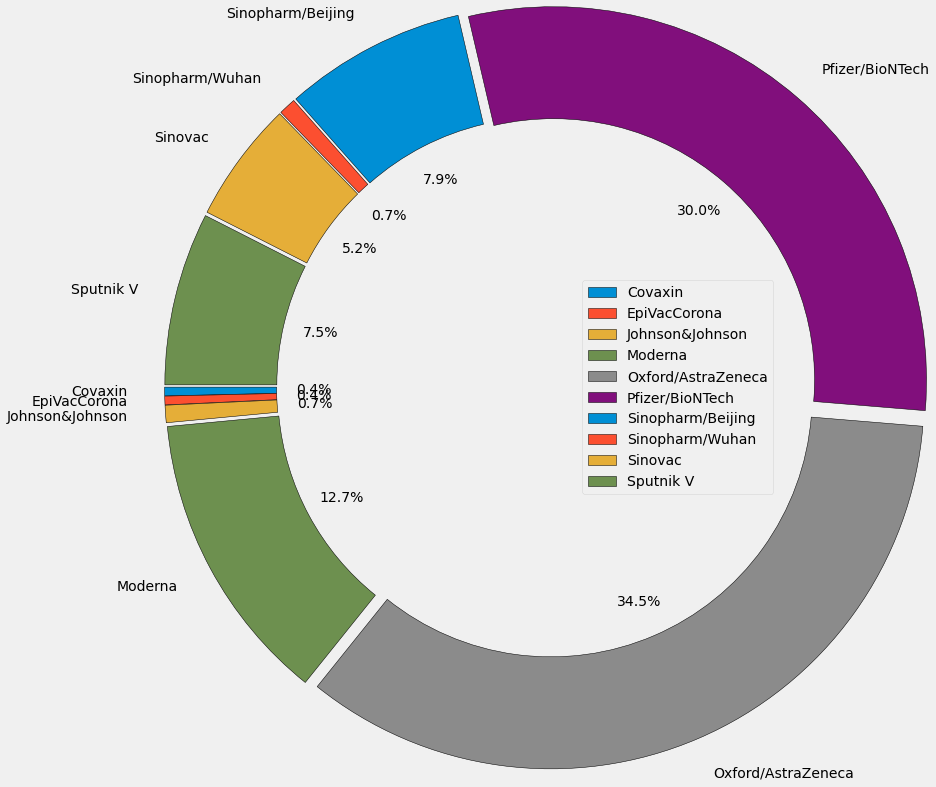

In [335]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
labels = summary2.index

plt.pie(summary2.pCountry, labels=labels, explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
        wedgeprops={'edgecolor':'black', 'width':0.6}, startangle=180, autopct='%1.1F%%', radius=2)

plt.legend(loc='right')
plt.show()

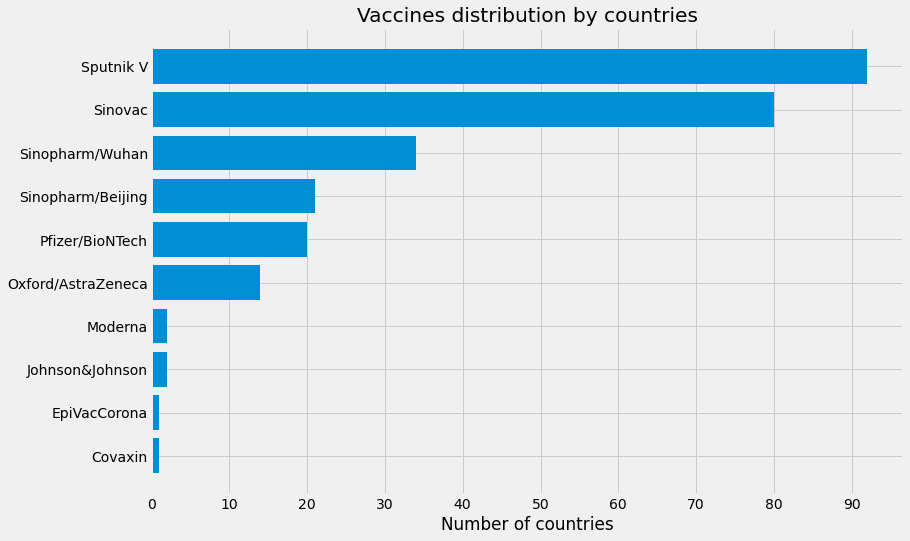

In [344]:
plt.figure(figsize=(12,8))
plt.title("Vaccines distribution by countries")
plt.style.use('fivethirtyeight')
plt.xlabel('Number of countries')
plt.xticks(np.arange(0,110,10))

plt.barh(summary.index, summary.nCountry.sort_values())
plt.show()